In [1]:
import sys
import pickle

sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt

import cv2

from data_loader.load_data import ImagesLoader

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
DATASET_NAME = 'simpsons-small'

In [ ]:
loader = ImagesLoader(train_images_path='../data/{DATASET_NAME}/train/',
                      test_images_path='../data/{DATASET_NAME}/test/')

data = loader.load_data()

+ 'names_files' loaded
+ 'names_paths' loaded
+ 'names_characters' loaded
+ 'names_encoded' loaded
+ 'images_original' loaded
+ 'images_resized' loaded
+ 'images_gray' loaded
+ 'images_blue' loaded
+ 'images_green' loaded
+ 'images_red' loaded
+ 'images_hsv' loaded
+ 'images_h' loaded
+ 'images_s' loaded
+ 'images_v' loaded
+ 'images_lbp' loaded
+ 'images_hu' loaded
+ 'images_gabor' loaded
+ 'images_hog' loaded
+ 'descriptor_blue' loaded
+ 'descriptor_green' loaded
+ 'descriptor_red' loaded
+ 'descriptor_rgb' loaded
+ 'descriptor_h' loaded
+ 'descriptor_s' loaded
+ 'descriptor_v' loaded
+ 'descriptor_hsv' loaded
+ 'descriptor_lbp' loaded
+ 'descriptor_hu' loaded
+ 'descriptor_gabor' loaded
+ 'descriptor_hog' loaded
+ 'combination_rgb+hsv' loaded
+ 'combination_rgb+hsv+lbp' loaded
+ 'combination_rgb+hsv+hu' loaded
+ 'combination_rgb+hsv+hog' loaded
+ 'combination_rgb+hsv+lbp+hu' loaded
+ 'combination_rgb+hsv+lbp+hog' loaded
+ 'combination_rgb+hsv+hu+hog' loaded
+ 'combination_rgb+hsv+lb

In [6]:
# campos

fields = np.array(list(data.keys()))
fields

array(['names_files', 'names_paths', 'names_characters', 'names_encoded',
       'images_original', 'images_resized', 'images_gray', 'images_blue',
       'images_green', 'images_red', 'images_hsv', 'images_h', 'images_s',
       'images_v', 'images_lbp', 'images_hu', 'images_gabor',
       'images_hog', 'descriptor_blue', 'descriptor_green',
       'descriptor_red', 'descriptor_rgb', 'descriptor_h', 'descriptor_s',
       'descriptor_v', 'descriptor_hsv', 'descriptor_lbp',
       'descriptor_hu', 'descriptor_gabor', 'descriptor_hog',
       'combination_rgb+hsv', 'combination_rgb+hsv+lbp',
       'combination_rgb+hsv+hu', 'combination_rgb+hsv+hog',
       'combination_rgb+hsv+lbp+hu', 'combination_rgb+hsv+lbp+hog',
       'combination_rgb+hsv+hu+hog', 'combination_rgb+hsv+lbp+hu+hog',
       'combination_rgb+lbp', 'combination_rgb+hu', 'combination_rgb+hog',
       'combination_rgb+lbp+hu', 'combination_rgb+lbp+hog',
       'combination_rgb+hu+hog', 'combination_rgb+lbp+hu+hog',
     

# **INFORMAÇÕES**

In [5]:
# campos de nomes e labels

names_fields = fields[
    np.where(
        np.array(list(map(lambda i: i if 'names' in i else 0, fields))) != '0'
    )
]

names_fields

array(['names_files', 'names_paths', 'names_characters', 'names_encoded'],
      dtype='<U30')

In [6]:
# shape e exemplos

print('train/test shape =', data['names_files']['test'].shape,
                            data['names_files']['train'].shape)

print('\nfields start')
for field in names_fields:
    print(field, '=', data[field]['train'][:2], '...')

train/test shape = (106,) (253,)

fields start
names_files = ['bart001.bmp' 'bart002.bmp'] ...
names_paths = ['../data/simpsons-small/train/bart001.bmp'
 '../data/simpsons-small/train/bart002.bmp'] ...
names_characters = ['bart' 'bart'] ...
names_encoded = [0 0] ...


# **IMAGENS**

In [7]:
# campos de imagens

images_fields = fields[
    np.where(
        np.array(list(map(lambda i: i if 'images' in i else 0, fields))) != '0'
    )
]

images_fields

array(['images_original', 'images_resized', 'images_gray', 'images_blue',
       'images_green', 'images_red', 'images_hsv', 'images_h', 'images_s',
       'images_v', 'images_lbp', 'images_hu', 'images_gabor',
       'images_hog'], dtype='<U30')

In [8]:
# shapes

for field in images_fields:
    print(field, '=', data[field]['train'].shape,
          data[field]['test'].shape)

images_original = (253,) (106,)
images_resized = (253, 309, 387, 3) (106, 309, 387, 3)
images_gray = (253, 309, 387) (106, 309, 387)
images_blue = (253, 309, 387) (106, 309, 387)
images_green = (253, 309, 387) (106, 309, 387)
images_red = (253, 309, 387) (106, 309, 387)
images_hsv = (253, 309, 387, 3) (106, 309, 387, 3)
images_h = (253, 309, 387) (106, 309, 387)
images_s = (253, 309, 387) (106, 309, 387)
images_v = (253, 309, 387) (106, 309, 387)
images_lbp = (253, 309, 387) (106, 309, 387)
images_hu = (253, 309, 387) (106, 309, 387)
images_gabor = (253, 309, 387) (106, 309, 387)
images_hog = (253, 309, 387) (106, 309, 387)


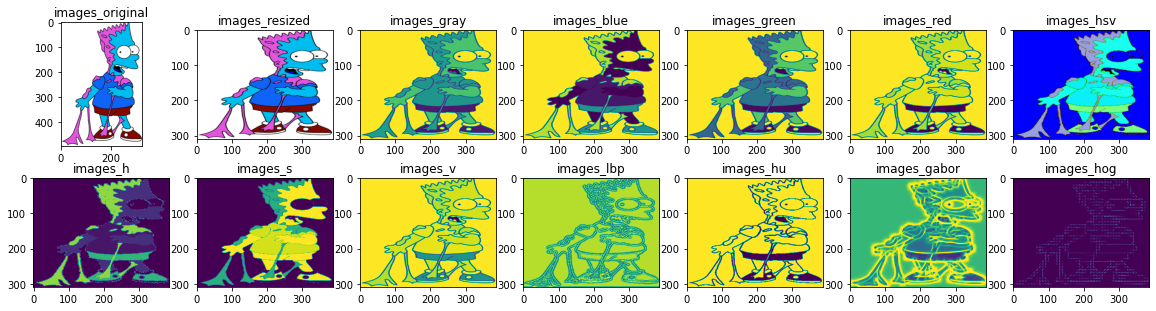

In [9]:
fig, ax = plt.subplots(2, len(images_fields)//2, figsize=(20,5))

for i in range(len(images_fields)):
    ax.ravel()[i].imshow(data[images_fields[i]]['train'][0]);
    ax.ravel()[i].set_title(images_fields[i]);

# **DESCRITORES**

In [10]:
# campos de descritores

descriptors_fields = fields[
    np.where(
        np.array(list(map(lambda i: i if 'descriptor' in i else 0, fields))) != '0'
    )
]

descriptors_fields

array(['descriptor_blue', 'descriptor_green', 'descriptor_red',
       'descriptor_rgb', 'descriptor_h', 'descriptor_s', 'descriptor_v',
       'descriptor_hsv', 'descriptor_lbp', 'descriptor_hu',
       'descriptor_gabor', 'descriptor_hog'], dtype='<U30')

In [11]:
# shape dos descritores

for field in descriptors_fields:
    print(field, '=', data[field]['train'].shape, data[field]['test'].shape)

descriptor_blue = (253, 256) (106, 256)
descriptor_green = (253, 256) (106, 256)
descriptor_red = (253, 256) (106, 256)
descriptor_rgb = (253, 768) (106, 768)
descriptor_h = (253, 256) (106, 256)
descriptor_s = (253, 256) (106, 256)
descriptor_v = (253, 256) (106, 256)
descriptor_hsv = (253, 768) (106, 768)
descriptor_lbp = (253, 10) (106, 10)
descriptor_hu = (253, 7) (106, 7)
descriptor_gabor = (253, 8, 31, 31) (106, 8, 31, 31)
descriptor_hog = (253, 62604) (106, 62604)


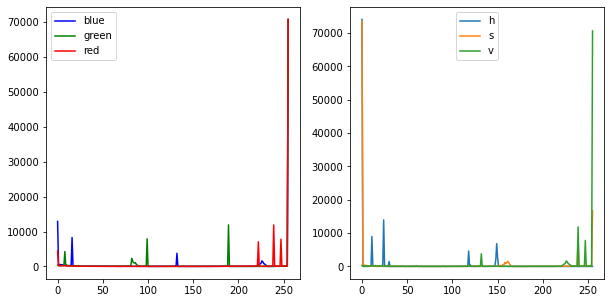

In [12]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].plot(data['descriptor_blue']['train'][0], color='b', label='blue');
ax[0].plot(data['descriptor_green']['train'][0], color='g', label='green');
ax[0].plot(data['descriptor_red']['train'][0], color='r', label='red');
ax[0].legend();

ax[1].plot(data['descriptor_h']['train'][0], label='h');
ax[1].plot(data['descriptor_s']['train'][0], label='s');
ax[1].plot(data['descriptor_v']['train'][0], label='v');
ax[1].legend();

In [13]:
# descritores

print('lbp')
print(data['descriptor_lbp']['train'][0], end='\n\n')

print('hu moments')
print(data['descriptor_hu']['train'][0])

print('hog')
print(data['descriptor_hog']['train'][0])

lbp
[0.01132268 0.01297843 0.00520977 0.02149135 0.06643085 0.08083925
 0.01813803 0.0557019  0.67308898 0.05479876]

hu moments
[  3.09780273   7.38602118  11.73736675  11.69862616 -25.37353813
  15.704182   -23.4166491 ]
hog
[0. 0. 0. ... 0. 0. 0.]


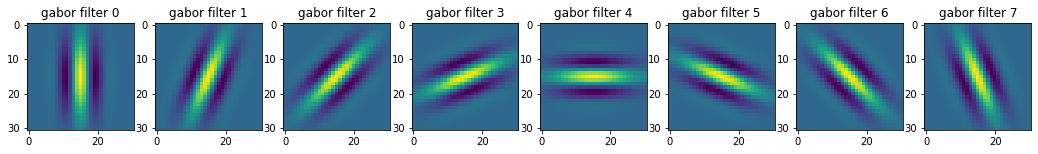

In [14]:
# descriptor gabor (filtros)

fig, ax = plt.subplots(1,8, figsize=(18,7))

for img_filter, i in zip(data['descriptor_gabor']['train'][0], range(8)):
    ax[i].imshow(img_filter);
    ax[i].set_title(f'gabor filter {i}');

# **COMBINAÇÕES**

In [15]:
# campos de combinações

combination_fields = fields[
    np.where(
        np.array(list(map(lambda i: i if 'combination' in i else 0, fields))) != '0'
    )
]

combination_fields

array(['combination_rgb+hsv', 'combination_rgb+hsv+lbp',
       'combination_rgb+hsv+hu', 'combination_rgb+hsv+hog',
       'combination_rgb+hsv+lbp+hu', 'combination_rgb+hsv+lbp+hog',
       'combination_rgb+hsv+hu+hog', 'combination_rgb+hsv+lbp+hu+hog',
       'combination_rgb+lbp', 'combination_rgb+hu', 'combination_rgb+hog',
       'combination_rgb+lbp+hu', 'combination_rgb+lbp+hog',
       'combination_rgb+hu+hog', 'combination_rgb+lbp+hu+hog',
       'combination_hsv+lbp', 'combination_hsv+hu', 'combination_hsv+hog',
       'combination_hsv+lbp+hu', 'combination_hsv+lbp+hog',
       'combination_hsv+hu+hog', 'combination_hsv+lbp+hu+hog'],
      dtype='<U30')

In [16]:
# shape das combinações

for field in combination_fields:
    print(field, '=', data[field]['train'].shape, data[field]['test'].shape)

combination_rgb+hsv = (253, 1536) (106, 1536)
combination_rgb+hsv+lbp = (253, 1546) (106, 1546)
combination_rgb+hsv+hu = (253, 1543) (106, 1543)
combination_rgb+hsv+hog = (253, 64140) (106, 64140)
combination_rgb+hsv+lbp+hu = (253, 1553) (106, 1553)
combination_rgb+hsv+lbp+hog = (253, 64150) (106, 64150)
combination_rgb+hsv+hu+hog = (253, 64147) (106, 64147)
combination_rgb+hsv+lbp+hu+hog = (253, 64157) (106, 64157)
combination_rgb+lbp = (253, 778) (106, 778)
combination_rgb+hu = (253, 775) (106, 775)
combination_rgb+hog = (253, 63372) (106, 63372)
combination_rgb+lbp+hu = (253, 785) (106, 785)
combination_rgb+lbp+hog = (253, 63382) (106, 63382)
combination_rgb+hu+hog = (253, 63379) (106, 63379)
combination_rgb+lbp+hu+hog = (253, 63389) (106, 63389)
combination_hsv+lbp = (253, 778) (106, 778)
combination_hsv+hu = (253, 775) (106, 775)
combination_hsv+hog = (253, 63372) (106, 63372)
combination_hsv+lbp+hu = (253, 785) (106, 785)
combination_hsv+lbp+hog = (253, 63382) (106, 63382)
combin